https://data.wprdc.org/dataset/market-value-analysis-2021

# Most Expensive Housing Neighborhood in Allegany County

![done!](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExYWRlamowd3IwMHpsNnpqejFicnNuNmpwZm45NXhkdDc2eDNqNXpmNyZlcD12MV9naWZzX3NlYXJjaCZjdD1n/UqqVRaP8y4uo1GNxbN/giphy.gif)

Using the 2013 American Community Survey data, our group decided to focus on figuring out what makes the "Best Housing." We agreed that a good starting point would be looking at the average house value in each neighborhood. Usually, the more expensive homes are considered the best because they often have more upgrades, better renovations, and newer features.

Before we could pinpoint the "best" neighborhoods, we worked on visualizing the data from the CSV file to get a clear picture of what we were working with. From there, we identified the top 5 income brackets, which helped us narrow things down even further. Our next step was to calculate the most expensive neighborhoods by checking how many homes fell into those higher income brackets. This approach gave us a way to rank neighborhoods based on house values. It wasn’t perfect, but it gave us a solid starting point!

In [5]:
import pandas as pd

# Attempt to load the file from the specified directory
file_path = "/Users/emily/Documents/value.csv"
data = pd.read_csv(file_path)

# Display the first few rows to confirm successful loading
data.head(25)

,Neighborhood,Id,Estimate; Total:,Margin of Error; Total:,"Estimate; Total: - Less than $10,000","Margin of Error; Total: - Less than $10,000","Estimate; Total: - $10,000 to $14,999","Margin of Error; Total: - $10,000 to $14,999","Estimate; Total: - $15,000 to $19,999","Margin of Error; Total: - $15,000 to $19,999",...,"Estimate; Total: - $300,000 to $399,999","Margin of Error; Total: - $300,000 to $399,999","Estimate; Total: - $400,000 to $499,999","Margin of Error; Total: - $400,000 to $499,999","Estimate; Total: - $500,000 to $749,999","Margin of Error; Total: - $500,000 to $749,999","Estimate; Total: - $750,000 to $999,999","Margin of Error; Total: - $750,000 to $999,999","Estimate; Total: - $1,000,000 or more","Margin of Error; Total: - $1,000,000 or more"
0,Allegheny Center,1,38.0,19.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000
1,Allegheny West,2,77.0,34.000000,6.0,9.000000,0.0,10.000000,0.0,10.000000,...,17.0,19.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,6.0,9.000000
2,Allentown,3,575.0,124.004032,48.0,36.400549,19.0,21.840330,32.0,33.166248,...,0.0,17.320508,0.0,17.320508,5.0,16.248077,0.0,17.320508,0.0,17.320508
3,Arlington,4,469.0,93.866927,6.0,17.320508,16.0,19.339080,6.0,17.320508,...,0.0,17.320508,0.0,17.320508,0.0,17.320508,0.0,17.320508,2.0,14.696938
4,Arlington Heights,5,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000
5,Banksville,6,980.0,116.773285,28.0,36.386811,0.0,20.000000,0.0,20.000000,...,14.0,28.792360,0.0,20.000000,0.0,20.000000,0.0,20.000000,15.0,30.413813
6,Bedford Dwellings,7,51.0,37.000000,0.0,10.000000,5.0,8.000000,9.0,13.000000,...,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000,0.0,10.000000
7,Beechview,8,2043.0,189.261724,0.0,31.622777,0.0,31.622777,0.0,31.622777,...,0.0,31.622777,0.0,31.622777,0.0,31.622777,7.0,32.310989,0.0,31.622777
8,Beltzhoover,9,543.0,126.198257,4.0,19.078784,0.0,20.000000,75.0,59.506302,...,0.0,20.000000,0.0,20.000000,0.0,20.000000,0.0,20.000000,0.0,20.000000
9,Bloomfield,10,1650.0,149.338542,5.0,30.805844,18.0,33.466401,23.0,35.000000,...,101.0,47.958315,25.0,37.802116,21.0,38.078866,0.0,31.622777,0.0,31.622777


In [7]:
# Define columns that correspond to high-income brackets
high_income_brackets = [
    'Estimate; Total: - $300,000 to $399,999',
    'Estimate; Total: - $400,000 to $499,999',
    'Estimate; Total: - $500,000 to $749,999',
    'Estimate; Total: - $750,000 to $999,999',
    'Estimate; Total: - $1,000,000 or more'
]

# Calculate the total Most Expensive Housing estimate for each neighborhood
data['Most Expensive Housing'] = data[high_income_brackets].sum(axis=1)

# Sort neighborhoods by the Most Expensive Housing total in descending order and select the top 10
top_10_expensive_neighborhoods = data[['Neighborhood', 'Most Expensive Housing']].sort_values(by='Most Expensive Housing', ascending=False).head(10)

# Display the result
top_10_expensive_neighborhoods

,Neighborhood,Most Expensive Housing
76,Squirrel Hill North,1427.0
77,Squirrel Hill South,1364.0
68,Shadyside,966.0
63,Point Breeze,733.0
39,Highland Park,454.0
72,South Side Flats,244.0
56,North Oakland,180.0
16,Central Business District,151.0
9,Bloomfield,147.0
53,Mount Washington,129.0


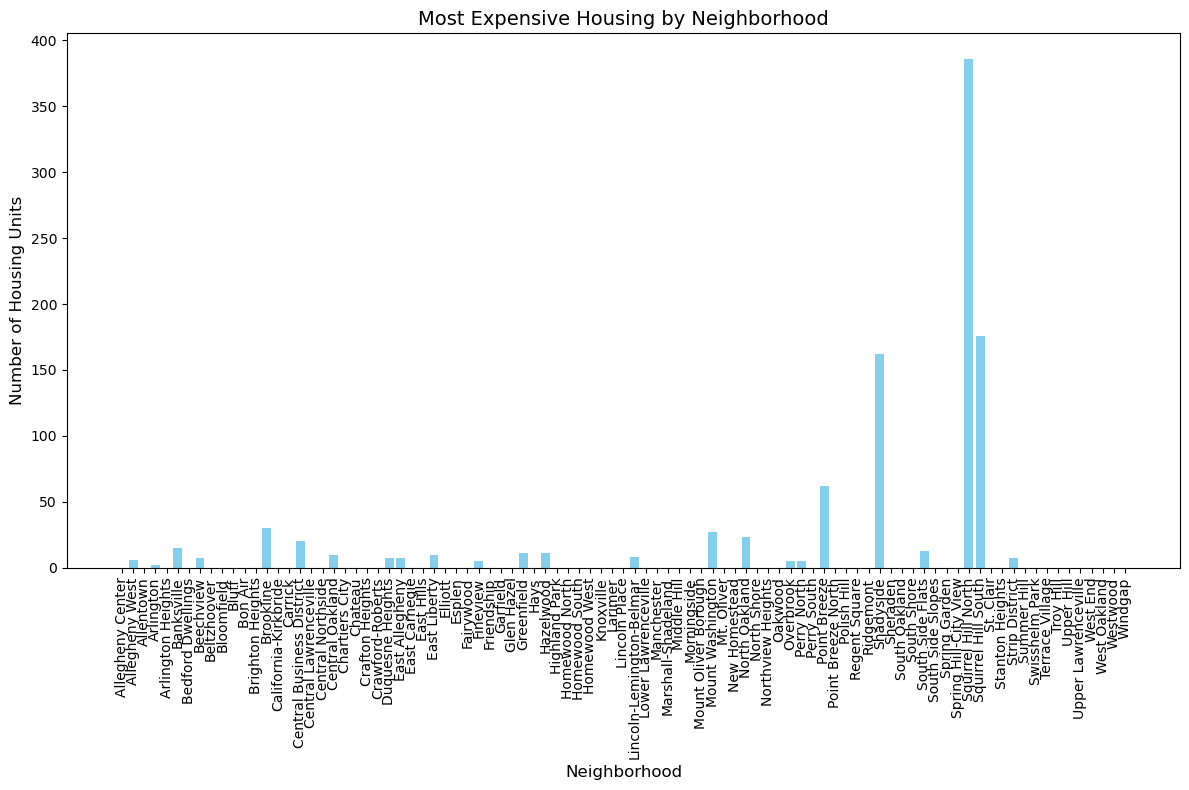

In [9]:
import matplotlib.pyplot as plt

# Extract relevant data
neighborhoods = data["Neighborhood"]
expensive_housing = data[["Estimate; Total: - $750,000 to $999,999", 
                          "Estimate; Total: - $1,000,000 or more"]]

# Plot the data
plt.figure(figsize=(12, 8))
expensive_housing_sum = expensive_housing.sum(axis=1)
plt.bar(neighborhoods, expensive_housing_sum, color="skyblue")
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.title("Most Expensive Housing by Neighborhood", fontsize=14)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Number of Housing Units", fontsize=12)
plt.tight_layout()
plt.show()

# Our Results
Based on our dataset and the script, it looks like Squirrel Hill North has the most expensive housing. This makes us think that Squirrel Hill might be one of the best neighborhoods overall, as it’s packed with homes in higher price ranges. With all the pricey houses there, it’s likely that the area is full of upgrades and modern features that make it stand out.

Squirrel Hill South also came in pretty high on the list, so it seems like the entire Squirrel Hill area is known for its quality housing. Shadyside and Point Breeze also made the top, but they don’t have as many homes in the highest brackets as Squirrel Hill does. From this, it’s fair to say Squirrel Hill really sets itself apart in terms of expensive—and possibly the “best”—housing.

![done!](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExdnJvbzB2eDczeDFyZTA2czY1eHh4YXQydno1NGJvZ3czdmlpc3hpNSZlcD12MV9naWZzX3NlYXJjaCZjdD1n/1SvnHJFEuEH7hp81tF/giphy.gif)